<a href="https://colab.research.google.com/github/SamuelWanjiru/Bike-sharing-forecast/blob/main/BikeSharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Bike Sharing Washington DC 🚲** 
---
## **Context**
Climate change is forcing cities to re-imaging their transportation infrastructure. Shared mobility concepts, such as car sharing, bike sharing or scooter sharing become more and more popular.
And if they are implemented well, they can actually contribute to mitigating climate change. Bike sharing in particular is interesting because no electricity of gasoline is necessary (unless e-bikes are used) for this mode of transportation. However, there are inherent problems to this type of shared mobility:
*   varying demand at bike sharing stations needs to be balanced to avoid oversupply or shortages
*   Heavily used bikes break down more often

Forecasting the future demand can help address those issues. Moreover, demand forecasts can help operators decide whether to expand the business, determine adequate prices and generate additional income through advertisements at particularly busy stations.
But that's not all. Another challenge is redistributing bikes between stations and determining the optimal routes. And determining the location of new stations is also an area of interest for operators.

## **Content**
This dataset can be used to forecast demand to avoid oversupply and shortages. It spans from January 1, 2011, until December 31, 2018. Determining new station locations, analyzing movement patterns or planning routes will only be possible with additional data.

## **Connecting/mounting the google drive**

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## **Importing the relevant data analysis libraries**

In [129]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
import math
from scipy.stats import kruskal, pearsonr, randint, uniform, chi2_contingency, boxcox
from statsmodels.tsa.stattools import grangercausalitytests, adfuller, kpss, acf, pacf
from datetime import datetime
from statsmodels.tsa.stattools import grangercausalitytests, adfuller, kpss, acf, pacf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline, FeatureUnion

## Loading the dataset from google drive and converting the date column to a datetime variable.

In [3]:
bike_data=pd.read_csv(r'/content/gdrive/My Drive/KAGGLE PROJECTS/Bike Sharing Washington DC/bike_sharing_dataset.csv')

## **Understanding the data**

In [4]:
# Displaying the 1st 5 rows of the bike dataset
bike_data.head()

,date,temp_avg,temp_min,temp_max,temp_observ,precip,wind,wt_fog,wt_heavy_fog,wt_thunder,...,wt_freeze_rain,wt_snow,wt_ground_fog,wt_ice_fog,wt_freeze_drizzle,wt_unknown,casual,registered,total_cust,holiday
0,2011-01-01,NaN,-1.566667,11.973333,2.772727,0.069333,2.575,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,330.0,629.0,959.0,NaN
1,2011-01-02,NaN,0.880000,13.806667,7.327273,1.037349,3.925,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,130.0,651.0,781.0,NaN
2,2011-01-03,NaN,-3.442857,7.464286,-3.060000,1.878824,3.625,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,120.0,1181.0,1301.0,NaN
3,2011-01-04,NaN,-5.957143,4.642857,-3.100000,0.000000,1.800,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,107.0,1429.0,1536.0,NaN
4,2011-01-05,NaN,-4.293333,6.113333,-1.772727,0.000000,2.950,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,82.0,1489.0,1571.0,NaN


In [5]:
# Descriptive statistics
bike_data.describe()

,temp_avg,temp_min,temp_max,temp_observ,precip,wind,wt_fog,wt_heavy_fog,wt_thunder,wt_sleet,...,wt_freeze_rain,wt_snow,wt_ground_fog,wt_ice_fog,wt_freeze_drizzle,wt_unknown,casual,registered,total_cust,holiday
count,2101.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,1503.0,208.0,694.0,129.0,...,5.0,84.0,36.0,10.0,4.0,1.0,2918.000000,2918.000000,2918.000000,89.0
mean,14.419007,8.506468,19.015689,11.069243,3.435734,3.162898,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1679.776217,6046.297121,7726.073338,1.0
std,9.556401,9.473941,9.835524,9.481232,8.183658,1.379582,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,1560.762932,2756.888032,3745.220092,0.0
min,-12.100000,-16.993750,-7.980000,-15.658333,0.000000,0.375000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.000000,19.000000,21.000000,1.0
25%,6.566667,0.516538,11.081562,3.013068,0.005510,2.200000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,512.250000,3839.250000,4628.500000,1.0
50%,15.433333,8.504911,19.992857,11.619091,0.271504,2.900000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1220.500000,5964.000000,7442.500000,1.0
75%,23.066667,17.338393,27.874583,19.767083,2.885381,3.875000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2357.250000,8187.500000,10849.500000,1.0
max,31.733333,26.206250,37.850000,28.666667,118.789796,12.750000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,10173.000000,15419.000000,19113.000000,1.0


In [6]:
# Checking the data types of every varaible

bike_data.dtypes

date                  object
temp_avg             float64
temp_min             float64
temp_max             float64
temp_observ          float64
precip               float64
wind                 float64
wt_fog               float64
wt_heavy_fog         float64
wt_thunder           float64
wt_sleet             float64
wt_hail              float64
wt_glaze             float64
wt_haze              float64
wt_drift_snow        float64
wt_high_wind         float64
wt_mist              float64
wt_drizzle           float64
wt_rain              float64
wt_freeze_rain       float64
wt_snow              float64
wt_ground_fog        float64
wt_ice_fog           float64
wt_freeze_drizzle    float64
wt_unknown           float64
casual               float64
registered           float64
total_cust           float64
holiday              float64
dtype: object

### All the variables apart from date are float variables. The date variable is converted to a datetime variable at the point of data loading.


### **Checking and dealing with missing values**

In [7]:
bike_data.isnull().sum()

date                    0
temp_avg              821
temp_min                0
temp_max                0
temp_observ             0
precip                  0
wind                    0
wt_fog               1419
wt_heavy_fog         2714
wt_thunder           2228
wt_sleet             2793
wt_hail              2872
wt_glaze             2769
wt_haze              2217
wt_drift_snow        2915
wt_high_wind         2664
wt_mist              2551
wt_drizzle           2794
wt_rain              2516
wt_freeze_rain       2917
wt_snow              2838
wt_ground_fog        2886
wt_ice_fog           2912
wt_freeze_drizzle    2918
wt_unknown           2921
casual                  4
registered              4
total_cust              4
holiday              2833
dtype: int64

In [8]:
# fill missing values with 0 where applicable

wt_features = [x for x in bike_data.columns if 'wt' in x]
bike_data['holiday'] = bike_data['holiday'].fillna(0)
bike_data[wt_features] = bike_data[wt_features].fillna(0)

In [9]:
# check casual, registered and total_cust missing rows
missing_target = bike_data[bike_data['total_cust'].isna()]
missing_target

,date,temp_avg,temp_min,temp_max,temp_observ,precip,wind,wt_fog,wt_heavy_fog,wt_thunder,...,wt_freeze_rain,wt_snow,wt_ground_fog,wt_ice_fog,wt_freeze_drizzle,wt_unknown,casual,registered,total_cust,holiday
1848,2016-01-23,-4.366667,-6.128571,-2.392857,-4.688889,42.045946,8.08,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
1849,2016-01-24,-2.666667,-7.985714,-1.028571,-6.366667,19.339130,3.75,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
1850,2016-01-25,-5.133333,-11.128571,2.028571,-9.877778,0.000000,1.15,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
1851,2016-01-26,2.333333,-7.871429,7.471429,3.588889,0.000000,2.85,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0


There seem to be four days where no data was captured for the rented bikes. 
Being a time series, i will interpolate these missing values using the forward fill method.

In [10]:
# filling the missing values in the customer variables with forward fill method
bike_data[['total_cust', 'casual', 'registered']] = bike_data[['total_cust', 'casual', 'registered']].fillna( method='ffill')
bike_data.isnull().sum()

date                   0
temp_avg             821
temp_min               0
temp_max               0
temp_observ            0
precip                 0
wind                   0
wt_fog                 0
wt_heavy_fog           0
wt_thunder             0
wt_sleet               0
wt_hail                0
wt_glaze               0
wt_haze                0
wt_drift_snow          0
wt_high_wind           0
wt_mist                0
wt_drizzle             0
wt_rain                0
wt_freeze_rain         0
wt_snow                0
wt_ground_fog          0
wt_ice_fog             0
wt_freeze_drizzle      0
wt_unknown             0
casual                 0
registered             0
total_cust             0
holiday                0
dtype: int64

In [11]:
# check what the correlation between the different temperature features and total_cust is
# correlation between temp_avg and total_cust excluding the first 820 rows

print('temp_avg:', pearsonr(bike_data['temp_avg'][821:], bike_data['total_cust'][821:]))

# correlation between temp_min and total_cust
print('temp_min:', pearsonr(bike_data['temp_min'], bike_data['total_cust']))
print('temp_min, without first 820 rows:', pearsonr(bike_data['temp_min'][821:], bike_data['total_cust'][821:]))

# correlation between temp_max and total_cust
print('temp_max:', pearsonr(bike_data['temp_max'], bike_data['total_cust']))
print('temp_max, without first 820 rows:', pearsonr(bike_data['temp_max'][821:], bike_data['total_cust'][821:]))

# correlation between temp_observ and total_cust
print('temp_observ:', pearsonr(bike_data['temp_observ'], bike_data['total_cust']))
print('temp_observ, without first 820 rows:', pearsonr(bike_data['temp_observ'][821:], bike_data['total_cust'][821:]))

temp_avg: (0.7289653483071338, 0.0)
temp_min: (0.5484063784007367, 3.92265728990609e-229)
temp_min, without first 820 rows: (0.6720561174778342, 3.5204893405440216e-276)
temp_max: (0.5962507437902363, 6.986689659232709e-281)
temp_max, without first 820 rows: (0.7406902128448435, 0.0)
temp_observ: (0.5500110613450737, 9.817169026462281e-231)
temp_observ, without first 820 rows: (0.6804926361142358, 9.041087867799183e-286)


The above shows that disregarding the first 820 rows leads to the highest correlation between temp_max and total_cust. Comparing temp_avg with the entire dataset and the respective correlations with total_cust, temp_avg has the highest correlation.

The Granger causality is a more appropriate measure for timeseries data and determining whether one time series is useful in forecasting another. Thus, below I am using the Granger causality test to see how the temperature features cause total_cust.

In [12]:
# calculating the Granger causality between the temperature feats and the target
print('Average temperature and target:')
grangercausalitytests(bike_data[['total_cust', 'temp_avg']][821:], maxlag=1);
print('\nMaximum temperature and target:')
grangercausalitytests(bike_data[['total_cust', 'temp_max']], maxlag=1);
print('\nMinimum temperature and target:')
grangercausalitytests(bike_data[['total_cust', 'temp_min']], maxlag=1);
print('\nObserved temperature and target:')
grangercausalitytests(bike_data[['total_cust', 'temp_observ']], maxlag=1);

Average temperature and target:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=176.4496, p=0.0000  , df_denom=2097, df_num=1
ssr based chi2 test:   chi2=176.7020, p=0.0000  , df=1
likelihood ratio test: chi2=169.6602, p=0.0000  , df=1
parameter F test:         F=176.4496, p=0.0000  , df_denom=2097, df_num=1

Maximum temperature and target:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=40.0233 , p=0.0000  , df_denom=2918, df_num=1
ssr based chi2 test:   chi2=40.0645 , p=0.0000  , df=1
likelihood ratio test: chi2=39.7922 , p=0.0000  , df=1
parameter F test:         F=40.0233 , p=0.0000  , df_denom=2918, df_num=1

Minimum temperature and target:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=88.8911 , p=0.0000  , df_denom=2918, df_num=1
ssr based chi2 test:   chi2=88.9825 , p=0.0000  , df=1
likelihood ratio test: chi2=87.6540 , p=0.0000  , df=1
parameter F test:         F=88.8911 , p=0.0000  , df_denom=2918,

**Data Preprocessing** : Below I will engineer some new features from the categorical and numeric features

In [13]:
# function to create seasons for dataframe

def seasons(df):
    '''
    Function to create new features for seasons based on months
    Args: df = dataframe
    Returns: df = dataframe
    Seasons: Spring, Summer & Fall
    '''
    
    # create a season features
    df['spring'] = df['date'].apply(lambda x: 1 if '01' in x[5:7] else 1 if '02' in x[5:7] else 1 
                                                     if '03' in x[5:7] else 0)
    df['summer'] = df['date'].apply(lambda x: 1 if '04' in x[5:7] else 1 if '05' in x[5:7] else 1 
                                                     if '06' in x[5:7] else 0)
    df['fall'] = df['date'].apply(lambda x: 1 if '07' in x[5:7] else 1 if '08' in x[5:7] else 1 
                                                     if '09' in x[5:7] else 0)
    
    return df

In [14]:
# create new features for seasons

bike_data = seasons(bike_data)

In [15]:
# create new feature weekday

bike_data['date_datetime'] = bike_data['date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

bike_data['weekday'] = bike_data['date_datetime'].apply(lambda x: x.weekday())

In [16]:
# one hot encode the feature weekday: returns a new dataframe with a column for every "level" of rating that exists,
# along with either a 1 or 0 specifying the presence of that rating for a given observation.

weekday_dummies = pd.get_dummies(bike_data['weekday'], prefix='weekday', drop_first=True)
bike_data = bike_data.join(weekday_dummies, how='left')
bike_data.head()

,date,temp_avg,temp_min,temp_max,temp_observ,precip,wind,wt_fog,wt_heavy_fog,wt_thunder,...,summer,fall,date_datetime,weekday,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2011-01-01,NaN,-1.566667,11.973333,2.772727,0.069333,2.575,1.0,0.0,0.0,...,0,0,2011-01-01,5,0,0,0,0,1,0
1,2011-01-02,NaN,0.880000,13.806667,7.327273,1.037349,3.925,1.0,1.0,0.0,...,0,0,2011-01-02,6,0,0,0,0,0,1
2,2011-01-03,NaN,-3.442857,7.464286,-3.060000,1.878824,3.625,0.0,0.0,0.0,...,0,0,2011-01-03,0,0,0,0,0,0,0
3,2011-01-04,NaN,-5.957143,4.642857,-3.100000,0.000000,1.800,0.0,0.0,0.0,...,0,0,2011-01-04,1,1,0,0,0,0,0
4,2011-01-05,NaN,-4.293333,6.113333,-1.772727,0.000000,2.950,0.0,0.0,0.0,...,0,0,2011-01-05,2,0,1,0,0,0,0


In [17]:
# create new feature working_day

bike_data['working_day'] = bike_data['weekday'].apply(lambda x: 0 if x > 5 or x == 0 else 1)
bike_data['working_day'] = bike_data[['holiday', 'working_day']].apply(
    lambda x: 0 if x['holiday'] == 1 else x['working_day'], axis=1)
bike_data.head(3)

,date,temp_avg,temp_min,temp_max,temp_observ,precip,wind,wt_fog,wt_heavy_fog,wt_thunder,...,fall,date_datetime,weekday,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,working_day
0,2011-01-01,NaN,-1.566667,11.973333,2.772727,0.069333,2.575,1.0,0.0,0.0,...,0,2011-01-01,5,0,0,0,0,1,0,1.0
1,2011-01-02,NaN,0.880000,13.806667,7.327273,1.037349,3.925,1.0,1.0,0.0,...,0,2011-01-02,6,0,0,0,0,0,1,0.0
2,2011-01-03,NaN,-3.442857,7.464286,-3.060000,1.878824,3.625,0.0,0.0,0.0,...,0,2011-01-03,0,0,0,0,0,0,0,0.0


**Dropping unnecessary columns**

I will drop the date feature and keep the date_datetime feature to have the feature with the correct date formatting. The registered and casual features will also be dropped because they are sub-features of the total_cust target label. I will also drop the temp_avg variable.

In [18]:
bike_data.drop(columns=['date', 'temp_avg', 'registered', 'casual'], inplace=True)

## **Exploratory Data Analysis**

We will start with analysing the categorical variables, that is, seasons

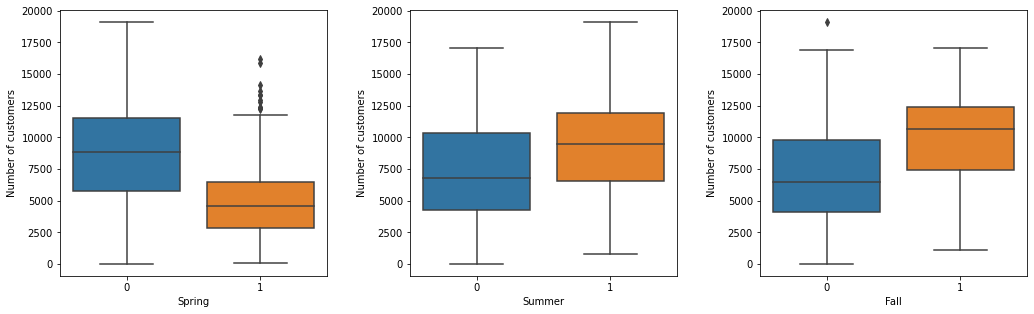

In [19]:
# variable to be used below to iterate through the columns and plot them

season = ['spring', 'summer', 'fall']

# plot boxplots for season versus number of users

plt.figure(figsize = [15, 5])

# boxplot for feature workingday

plt.subplot(1, 3, 1)
sb.boxplot(data = bike_data, x = 'spring', y = 'total_cust')
plt.xlabel('Spring')
plt.ylabel('Number of customers')

# boxplot for feature weekday

plt.subplot(1, 3, 2)
sb.boxplot(data = bike_data, x = 'summer', y = 'total_cust')
plt.xlabel('Summer')
plt.ylabel('Number of customers')

# boxplot for feature holiday
colors = ['lightblue', 'lightgreen']
plt.subplot(1, 3, 3)
sb.boxplot(data = bike_data, x = 'fall', y = 'total_cust')
plt.xlabel('Fall')
plt.ylabel('Number of customers');

plt.tight_layout(pad=3.0) # Using padding to space the subplots for better viewing
plt.show();

 Correlation between season features and the maximum temperature

*   using the Kruskal Wallis H test for correlations between a continuous and categorical variable



In [20]:
kruskal(bike_data['temp_max'], bike_data['summer'])

KruskalResult(statistic=4190.233790975473, pvalue=0.0)

The season feature clearly determines the customer demand for bikes, so this feature will be used for the final model.

### **Holiday**
The features holiday, weekday and workingday have some overlaps in their prediction of customer demand, thus, I will first analyze each individual feature and then investigate their correlation.

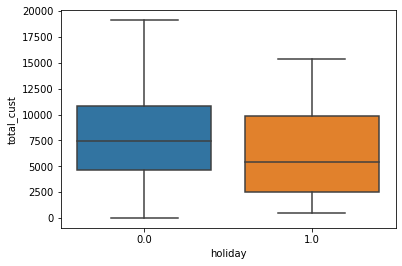

In [21]:
# plotting the customer statistics in form of a boxplot for the holiday feature

sb.boxplot(data = bike_data, x = 'holiday', y = 'total_cust');

For the holiday feature, we can clearly see that there is on average a higher demand for bikes on days that are not holidays. This feature will be used in the final model to predict the overall demand.

In [22]:
# Correlation between holiday feature and the number of customers per day

# using the Kruskal Wallis H test for correlations between a continuous and categorical variable

kruskal(bike_data['holiday'], bike_data['total_cust'])

KruskalResult(statistic=4945.69275502358, pvalue=0.0)

### **Weekday**

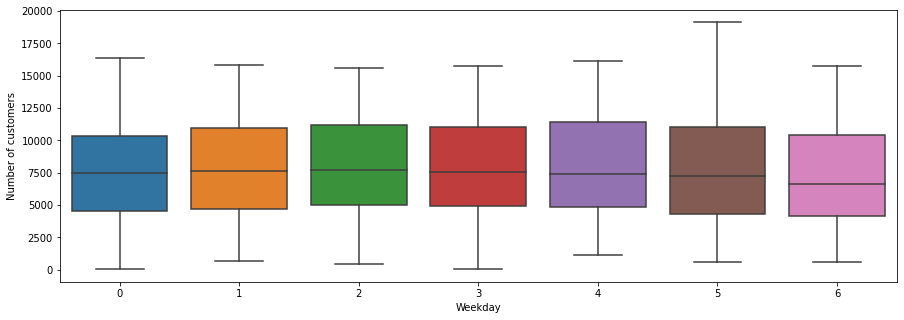

In [23]:
# plotting the customer statistics in form of a boxplot for the weekday feature

plt.figure(figsize = [15, 5])
sb.boxplot(data = bike_data, x = 'weekday', y = 'total_cust')
plt.xlabel('Weekday')
plt.ylabel('Number of customers');

In [24]:
# Correlation between weekday feature and the number of customers per day

# using Pearson's correlation coefficient because I'm assuming that weekday can be 

# considered a continuous variable

pearsonr(bike_data['weekday'], bike_data['total_cust'])

(-0.024760898572408853, 0.18086518739719304)

Based on the above distributions of number of customers per weekday, it appears that there are slight difference in demand depending on what weekday it is. Thus, the weekday will be considered to forecast the bike demand. But I still need to onehot encode the weekday because it is a categorical feature.

### **Workingday**

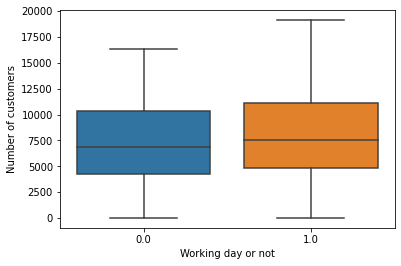

In [25]:
# plotting workday feature in boxplot against the count of customers

sb.boxplot(data = bike_data, x = 'working_day', y = 'total_cust')
plt.xlabel('Working day or not')
plt.ylabel('Number of customers');

In [26]:
# Correlation between working_day feature and the number of customers per day

# using the Kruskal Wallis H test for correlations between a continuous and categorical variable

kruskal(bike_data['working_day'], bike_data['total_cust'])

KruskalResult(statistic=4596.399701396863, pvalue=0.0)

In [27]:
# create a new dataframe that encodes the weekday feature with 0 for monday through friday
# and 1 for saturday and sunday

weekend_distinct_df = bike_data.copy()
weekend_distinct_df['weekday'] = weekend_distinct_df['weekday'].apply(lambda x: 1 if (x == 6 or x == 0) else 0)

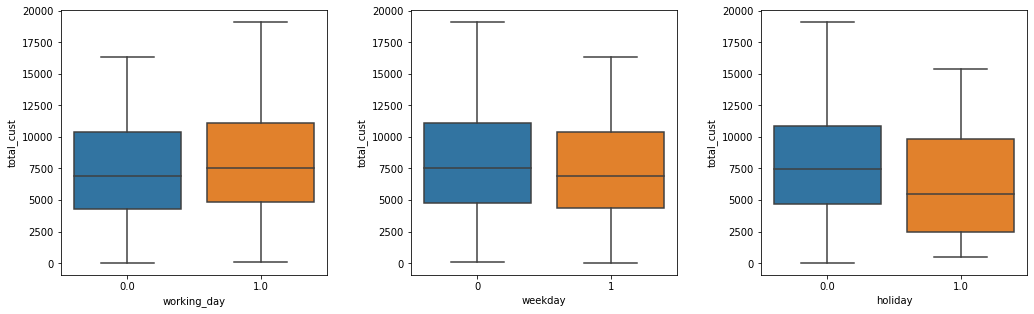

In [28]:
# plot boxplots for comparison between the weekday and workingday feature

plt.figure(figsize = [15, 5])

# boxplot for feature workingday

plt.subplot(1, 3, 1)
sb.boxplot(data = bike_data, x = 'working_day', y = 'total_cust');

# boxplot for feature weekday

plt.subplot(1, 3, 2)
sb.boxplot(data = weekend_distinct_df, x = 'weekday', y = 'total_cust');

# boxplot for feature holiday

plt.subplot(1, 3, 3)
sb.boxplot(data = bike_data, x = 'holiday', y = 'total_cust');

plt.tight_layout(pad=3.0) # Using padding to space the subplots for better viewing
plt.show();

In [29]:
# plot the means of each instance of workingday

bike_data.groupby('working_day')['total_cust'].mean()

working_day
0.0    7262.673563
1.0    7913.302144
Name: total_cust, dtype: float64

In [30]:
# plot the means of each instance of weekday

weekend_distinct_df.groupby('weekday')['total_cust'].mean()

weekday
0    7878.716203
1    7322.511962
Name: total_cust, dtype: float64

In [31]:
# plot the means of each instance of holiday

bike_data.groupby('holiday')['total_cust'].mean()

holiday
0.0    7771.698200
1.0    6060.685393
Name: total_cust, dtype: float64

**The features holiday, weekday and workingday are correlated with each other as well as with the target variable total_cust. However, they contain slightly different information that may be useful for predicting the target variable. Thus, they will all be used for the model**

**weather type features wt**

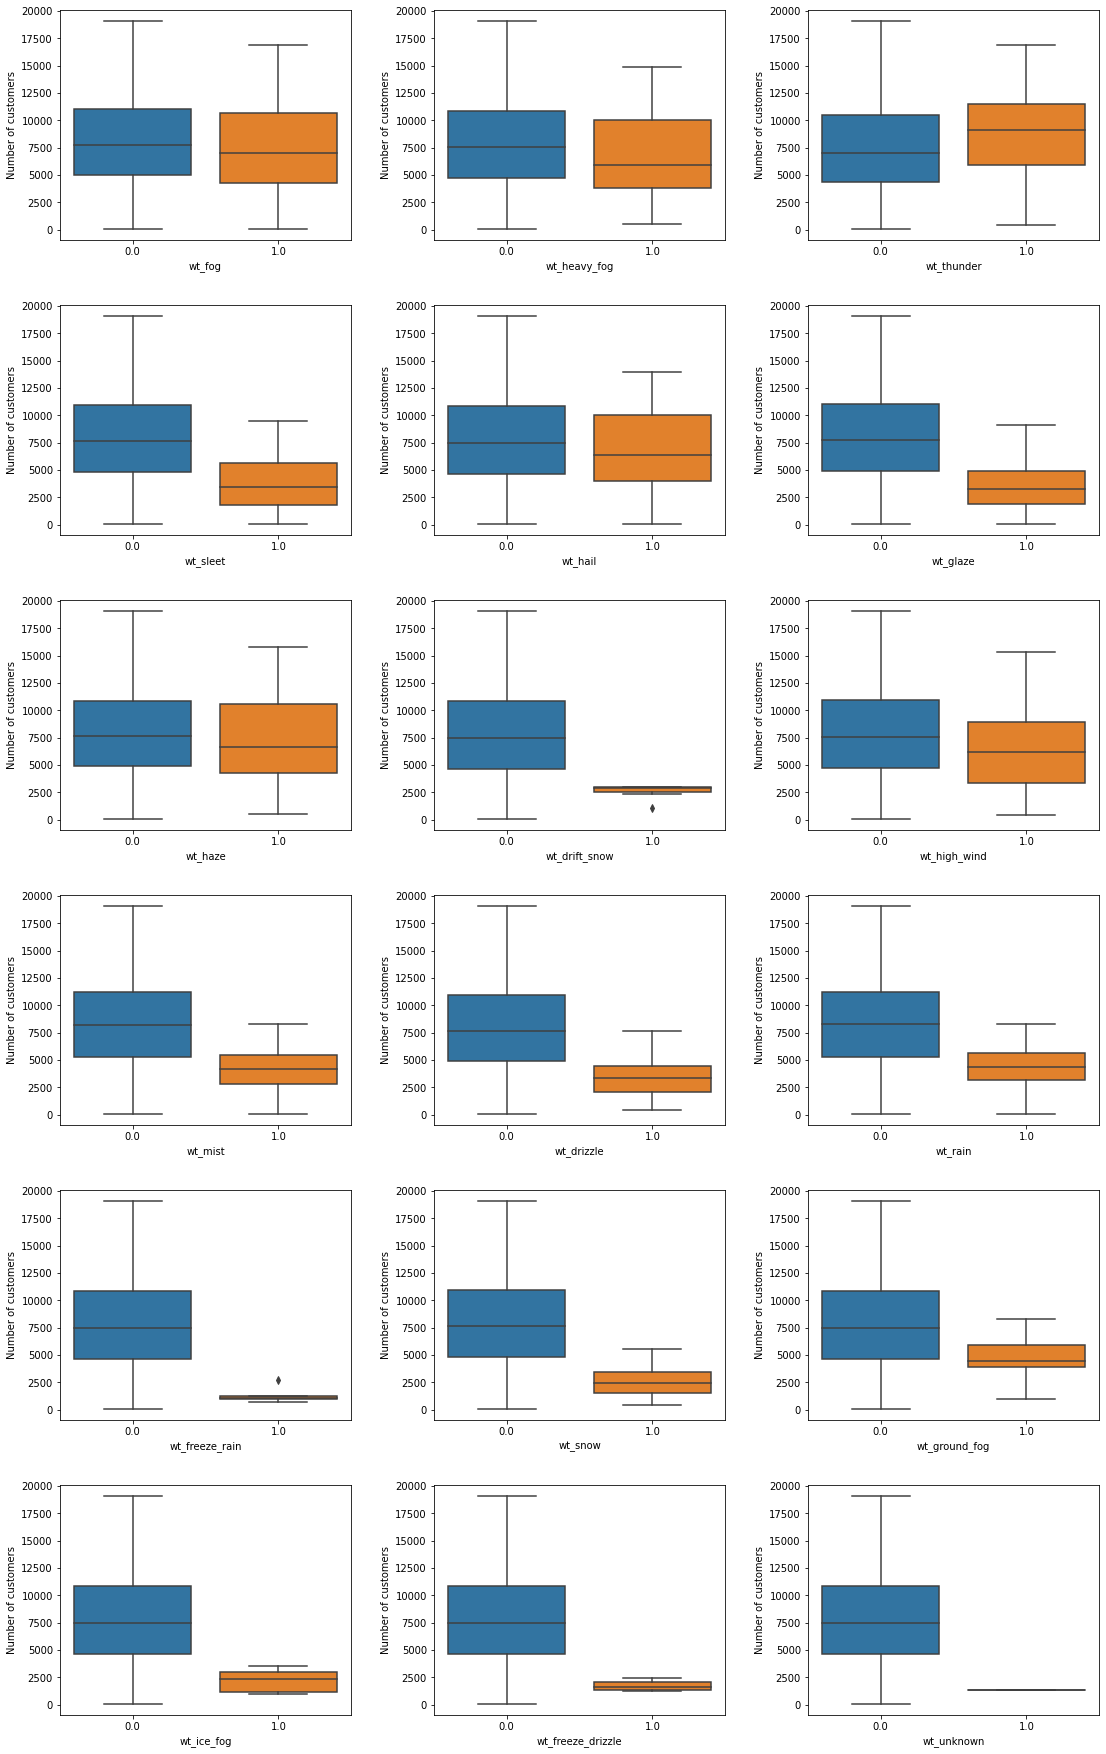

In [33]:
# plotting the revenue of the most common production companies vs. the rest
fig, ax = plt.subplots(6, 3, figsize = [16, 25])

# create list with all feature names 
wt_feat_list = [x for x in bike_data.columns if 'wt_' in x]

# company counter
counter = 0

for j in range(len(ax)):
    for i in range(len(ax[j])):
        if j == 5 and i == 3:
            break
        else:
            ax[j][i] = sb.boxplot(data = bike_data, x = wt_feat_list[counter], y = 'total_cust', ax=ax[j][i])
            ax[j][i].set_ylabel('Number of customers')
            ax[j][i].set_xlabel(wt_feat_list[counter])
            counter += 1

plt.tight_layout(pad=3.0) # Using padding to space the subplots for better viewing
plt.show();

Based on the distributions of the target value depending on the weather feature as well as based on the assessment of similar descriptive weather names/patterns, I will merge some of the weather features together.

In [34]:
# fog, heavy fog, hail, haze, high wind
bike_data['foggy'] = bike_data['wt_fog'] + bike_data['wt_heavy_fog'] + bike_data['wt_hail'] + bike_data['wt_haze'] + bike_data['wt_high_wind']
bike_data['foggy'] = bike_data['foggy'].apply(lambda x: 0 if x == 0 else 1)

# thunder
bike_data['thunder'] = bike_data['wt_thunder']

# ice_fog, unknown, freeze_drizzle, freeze_rain, drift_snow
bike_data['ice'] = bike_data['wt_ice_fog'] + bike_data['wt_unknown'] + bike_data['wt_freeze_drizzle'] + bike_data['wt_freeze_rain'] + bike_data['wt_drift_snow']
bike_data['ice'] = bike_data['ice'].apply(lambda x: 0 if x == 0 else 1)

# sleet, glaze, snow
bike_data['sleet'] = bike_data['wt_sleet'] + bike_data['wt_glaze'] + bike_data['wt_snow']
bike_data['sleet'] = bike_data['sleet'].apply(lambda x: 0 if x == 0 else 1)

# mist, drizzle, rain, ground fog
bike_data['rain'] = bike_data['wt_mist'] + bike_data['wt_drizzle'] + bike_data['wt_rain'] + bike_data['wt_ground_fog']
bike_data['rain'] = bike_data['rain'].apply(lambda x: 0 if x == 0 else 1)

In [35]:
# drop the old wt features

bike_data.drop(columns=wt_features, inplace=True)

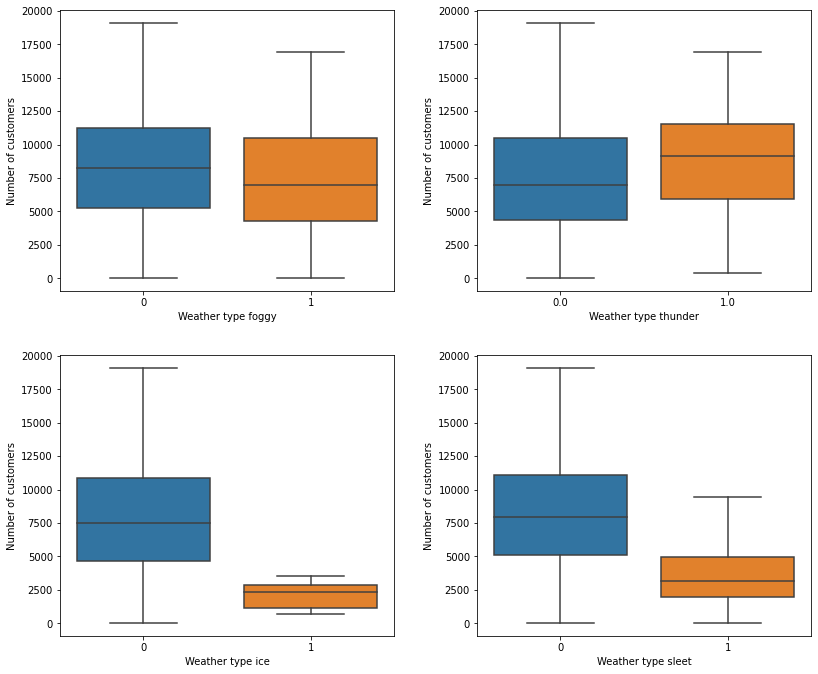

In [38]:
# plot boxplots for comparison between the new weather type features and target

plt.figure(figsize = [12, 10])

# boxplot for feature foggy

plt.subplot(2, 2, 1)
sb.boxplot(data = bike_data, x = 'foggy', y = 'total_cust')
plt.xlabel('Weather type foggy')
plt.ylabel('Number of customers')

# boxplot for feature thunder

plt.subplot(2, 2, 2)
sb.boxplot(data = bike_data, x = 'thunder', y = 'total_cust')
plt.xlabel('Weather type thunder')
plt.ylabel('Number of customers')

# boxplot for feature ice

plt.subplot(2, 2, 3)
sb.boxplot(data = bike_data, x = 'ice', y = 'total_cust')
plt.xlabel('Weather type ice')
plt.ylabel('Number of customers')

# boxplot for feature sleet

plt.subplot(2, 2, 4)
sb.boxplot(data = bike_data, x = 'sleet', y = 'total_cust')
plt.xlabel('Weather type sleet')
plt.ylabel('Number of customers');

plt.tight_layout(pad=3.0) # Using padding to space the subplots for better viewing
plt.show();

**ACF PLOT of wt_ features**

<Figure size 1080x432 with 0 Axes>

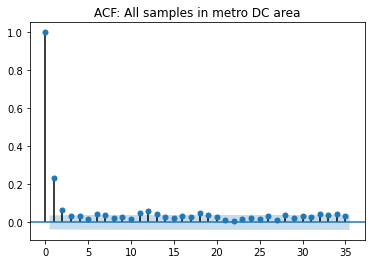

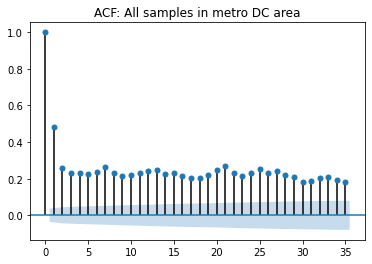

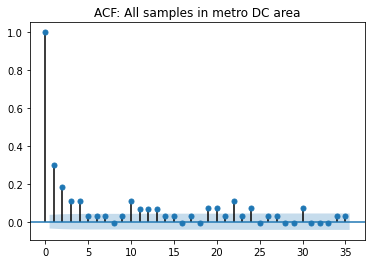

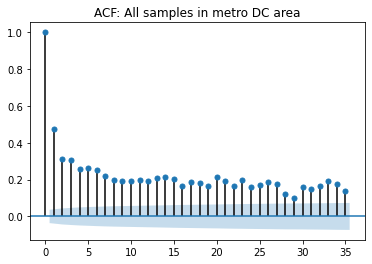

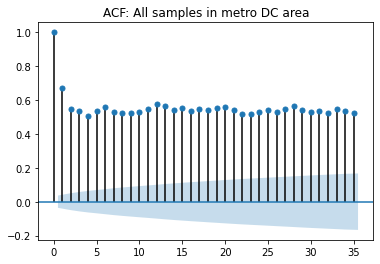

In [50]:
plt.figure(figsize=[15,6])

plot_acf(bike_data['foggy'], title='ACF: All samples in metro DC area',)
plt.show()

plot_acf(bike_data['thunder'], title='ACF: All samples in metro DC area',)
plt.show()

plot_acf(bike_data['ice'], title='ACF: All samples in metro DC area',)
plt.show()

plot_acf(bike_data['sleet'], title='ACF: All samples in metro DC area',)
plt.show()

plot_acf(bike_data['rain'], title='ACF: All samples in metro DC area',)
plt.show()

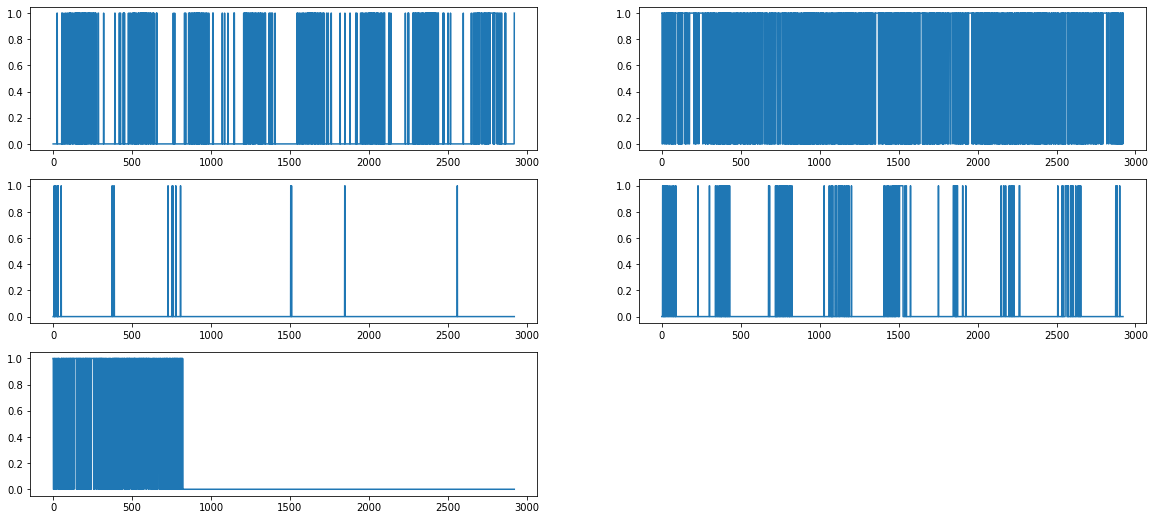

In [51]:
# plotting all newly created features
plt.figure(figsize=[20,9])

plt.subplot(3,2,1)
plt.plot(bike_data['thunder'])

plt.subplot(3, 2, 2)
plt.plot(bike_data['foggy'])

plt.subplot(3, 2, 3)
plt.plot(bike_data['ice'])

plt.subplot(3, 2, 4)
plt.plot(bike_data['sleet'])

plt.subplot(3, 2, 5)
plt.plot(bike_data['rain'])

The newly created rain feature seems to have been discontinued after two years into the time series. I will therefore drop this feature.

In [52]:
bike_data.drop(columns=['rain'], inplace=True)

In [53]:
# get list for all rolling sums between the weather features and the target

def best_window_sum(x, y, max_window):
    corr_temp_cust = []
    for i in range(1, max_window):
        roll_val = list(x.rolling(i).sum()[i-1:-1])
        total_cust_ti = list(y[i:])
        corr, p_val = pearsonr(total_cust_ti, roll_val)
        corr_temp_cust.append(corr)

    # get the optimal window size for rolling mean
    
    max_val = np.argmax(corr_temp_cust)
    min_val = np.argmin(corr_temp_cust)
    opt_corr_min = corr_temp_cust[min_val]
    opt_corr_max = corr_temp_cust[max_val]
    
    results = {max_val+1: opt_corr_max, min_val+1: opt_corr_min}
    
    return results

In [54]:
# get the optimal window for rolling sum for foggy

print(best_window_sum(bike_data['foggy'], bike_data['total_cust'], 30))


# get the correlation for window size determined by foggy

foggy_mean = bike_data['foggy'].rolling(8).sum()[7:-1]
pearsonr(foggy_mean, bike_data['total_cust'][8:])

{3: -0.03454117565250649, 29: -0.08701177677103925}


(-0.056992243357476005, 0.0020859976421017255)

In [55]:
# get the optimal window for rolling sum for thunder

print(best_window_sum(bike_data['thunder'], bike_data['total_cust'], 30))


# get the correlation for window size determined by thunder

thunder_mean = bike_data['thunder'].rolling(8).sum()[7:-1]
pearsonr(thunder_mean, bike_data['total_cust'][8:])

{29: 0.4348951971254514, 1: 0.21740383154927378}


(0.3589870088310652, 2.3622036013534496e-89)

In [56]:
# get the optimal window for rolling std for ice

print(best_window_sum(bike_data['ice'], bike_data['total_cust'], 30))


# get the correlation for window size determined by ice

ice_mean = bike_data['ice'].rolling(8).sum()[7:-1]
pearsonr(ice_mean, bike_data['total_cust'][8:])

{1: -0.1376282340431496, 29: -0.31631508748700815}


(-0.24895830557232207, 2.0516732047836366e-42)

In [57]:
# get the optimal window for rolling std for sleet

print(best_window_sum(bike_data['sleet'], bike_data['total_cust'], 30))


# get the correlation for window size determined by sleet

sleet_mean = bike_data['sleet'].rolling(8).sum()[7:-1]
pearsonr(sleet_mean, bike_data['total_cust'][8:])

{1: -0.30643580747310273, 21: -0.43628302776959116}


(-0.4032156282343481, 2.32726408555059e-114)

In [58]:
# drop any non-categorical variables
bike_data_corr_cat = bike_data.drop(columns=['date_datetime', 'weekday', 'temp_min', 'temp_max',
                                         'temp_observ', 'precip', 'wind', 'total_cust'], axis=1)


**Correlation heat map between categorical variables**

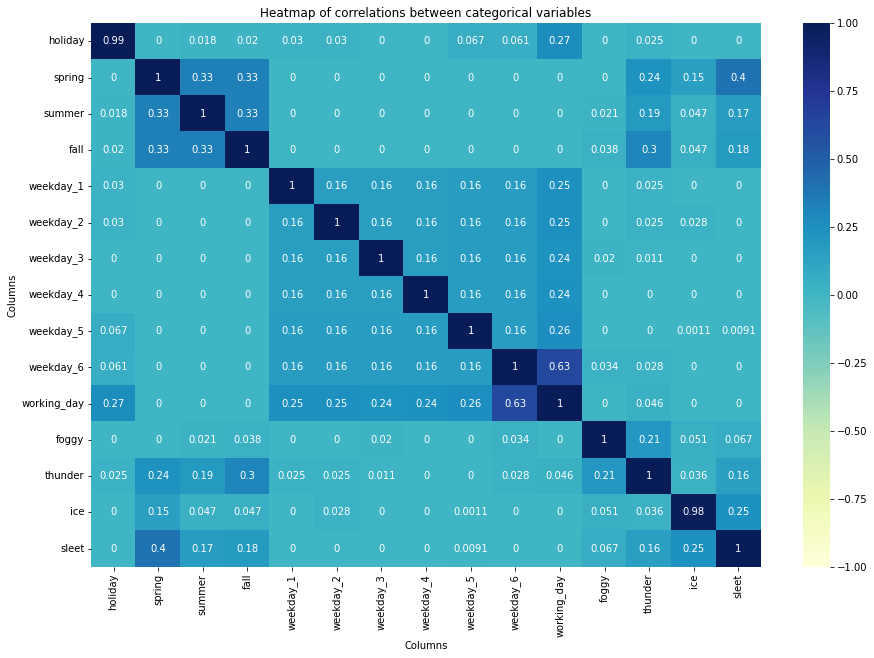

In [59]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# create correlation matrix with cramer's V coefficients
corr_matrix = pd.DataFrame(data = None, index=np.arange(len(bike_data_corr_cat.columns)), 
                            columns=bike_data_corr_cat.columns)

for col in bike_data_corr_cat.columns:
    count = 0
    for val in bike_data_corr_cat.columns:
        corr_cat = cramers_v(bike_data_corr_cat[col], bike_data_corr_cat[val])
        corr_matrix[col][count] = corr_cat
        count += 1
    corr_matrix = corr_matrix.astype('float')


# add an index to the dataframe
corr_matrix['columns'] = bike_data_corr_cat.columns
corr_matrix.set_index('columns', inplace=True)

# plot a heatmap for correlations between categorical variables
plt.figure(figsize=[15,10])
sb.heatmap(corr_matrix, annot=True,
          vmin=-1, vmax=1, center=0,
          fmt='.2g', cmap='YlGnBu')
plt.title('Heatmap of correlations between categorical variables')
plt.xlabel('Columns')
plt.ylabel('Columns');

The values of less than 1 for correlations between a feature and itself can be explained by very small sample sizes for the chi-squared test that cramer's v builds on. Moreover, there are a few correlations between the weather type features which I should exploit and merge together.

**Understanding the Continuous variables**

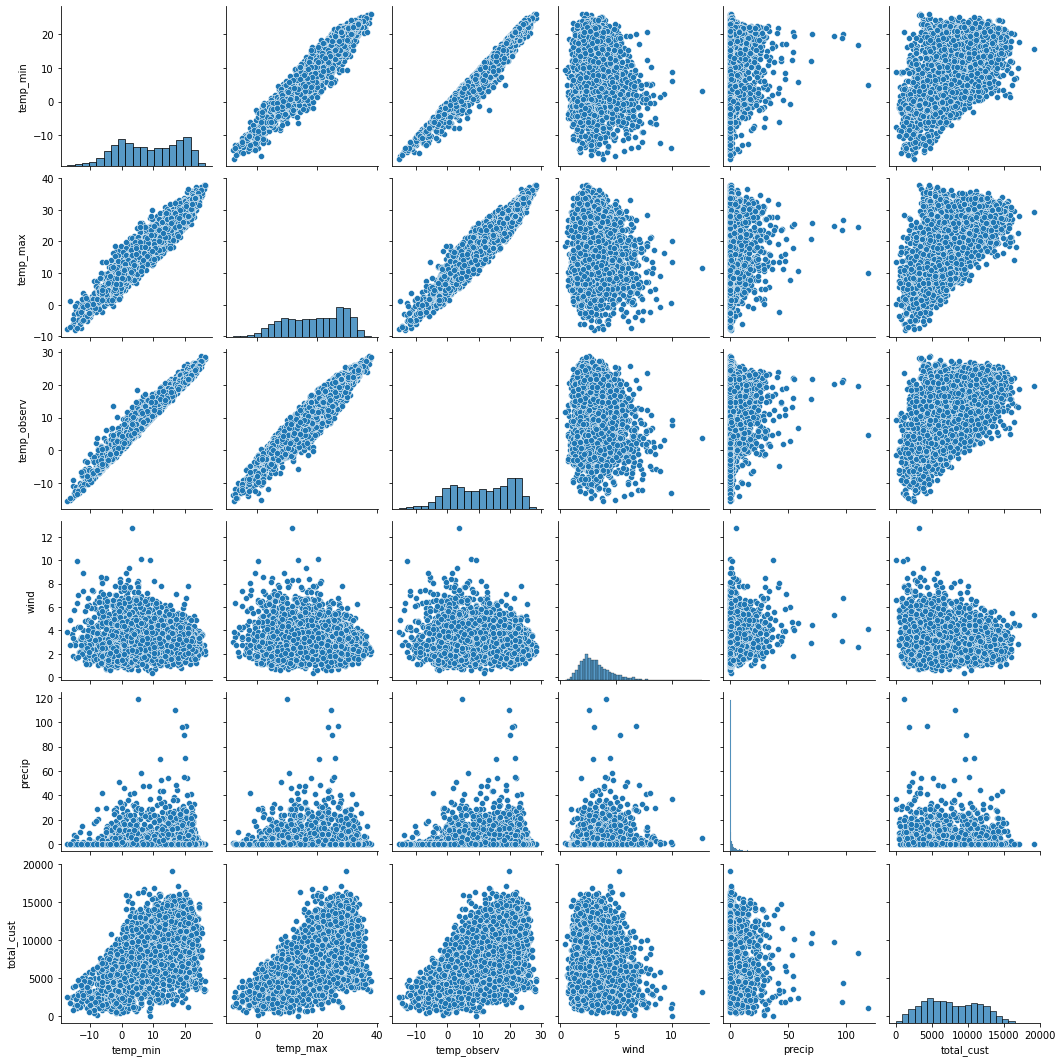

In [60]:
# plot all distributions and scatterplot between each continuous variable pair

sb.pairplot(bike_data, vars=['temp_min', 'temp_max', 'temp_observ', 'wind', 'precip', 'total_cust']);

Based on the results of the above pairplot, the following things are apparent:



*   **wind** looks like a Weibull distribution
*   there are **almost perfect linear relationships** among the **three temp features**
*   **precip** feature is **left skewed**
*   there is n**o linear relationship** between **precip** and any other feature
*   **wind** has **no linear relationship** with any other feature
*   the **temp features** have a **medium strong linear relationship** with the **total_cust target**








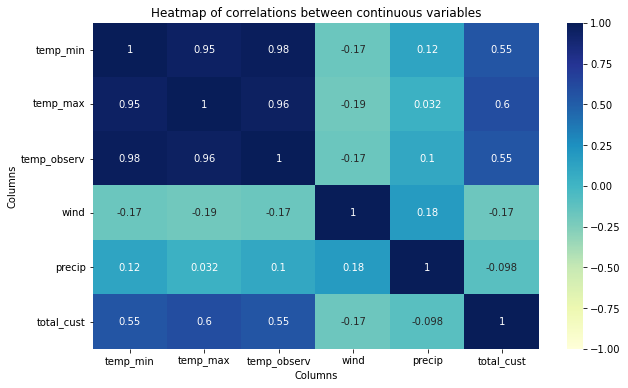

In [62]:
# create a correlation matrix

bike_data_corr = bike_data[['temp_min', 'temp_max', 'temp_observ', 'wind', 'precip', 'total_cust']].corr()


# create a heatmap to visualize the results

plt.figure(figsize=[10,6])
sb.heatmap(bike_data_corr, annot=True,
          vmin=-1, vmax=1, center=0,
          cmap='YlGnBu')
plt.title('Heatmap of correlations between continuous variables')
plt.xlabel('Columns')
plt.ylabel('Columns');

**The heatmap underlines the indications of the pairplot and a number of steps need to be taken:**


*   the temp features are highly correlated with each other. I will keep both temp_max and temp_min because I tried it in the model and it was working better with keeping both features and Zeng et al. 2012 also use both temp_min and temp_max.
*   there are only low to very low negative correlations between wind and precip with the target label, respectively. However, I will keep both features in my model.



In [63]:
# get list for all correlations between a feature and total_cust with different rolling means

def best_window(x, y, max_window):
    corr_temp_cust = []
    for i in range(1, max_window):
        roll_val = list(x.rolling(i).mean()[i-1:-1])
        total_cust_ti = list(y[i:])
        corr, p_val = pearsonr(total_cust_ti, roll_val)
        corr_temp_cust.append(corr)

    # get the optimal window size for rolling mean between a feature and total_cust
    
    max_val = np.argmax(corr_temp_cust)
    min_val = np.argmin(corr_temp_cust)
    opt_corr_min = corr_temp_cust[min_val]
    opt_corr_max = corr_temp_cust[max_val]
    
    results = {max_val+1: opt_corr_max, min_val+1: opt_corr_min}
    
    return results

In [64]:
# get list for all correlations between a feature and total_cust with different rolling standard deviations

def best_window_std(x, y, max_window):
    corr_temp_cust = []
    for i in range(2, max_window):
        roll_val = list(x.rolling(i).std()[i-1:-1])
        total_cust_ti = list(y[i:])
        corr, p_val = pearsonr(total_cust_ti, roll_val)
        corr_temp_cust.append(corr)

    # get the optimal window size for rolling std between a feature and total_cust
    
    max_val = np.argmax(corr_temp_cust)
    min_val = np.argmin(corr_temp_cust)
    opt_corr_min = corr_temp_cust[min_val]
    opt_corr_max = corr_temp_cust[max_val]
    
    results = {max_val+1: opt_corr_max, min_val+1: opt_corr_min}
    
    return results

**total_cust**

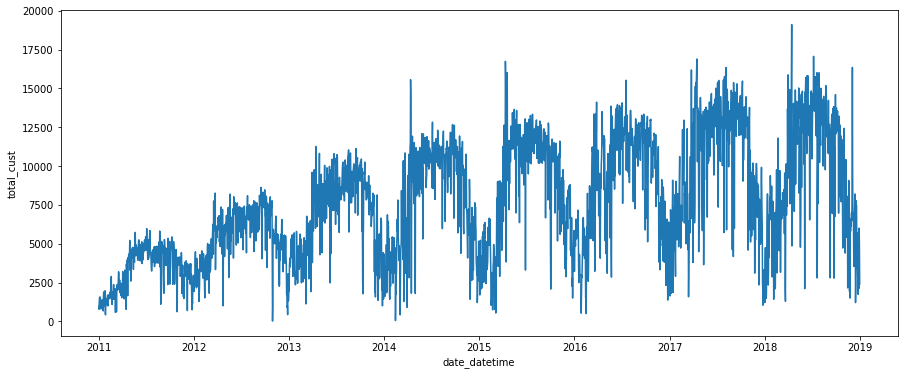

In [65]:
# plot the overall total_cust values for entire timeseries

plt.figure(figsize=[15,6])
ax = sb.lineplot(x='date_datetime', y='total_cust', data=bike_data)

It is obvious from the above plot that the time series is **non-stationary**. I will however deal with this later on before using the data in my model

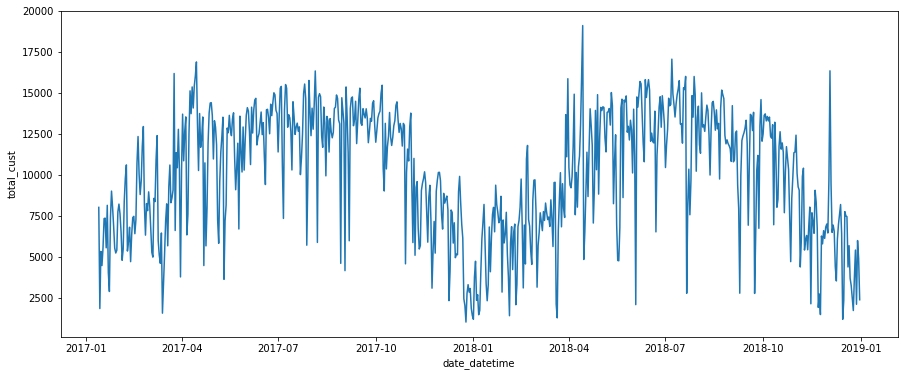

In [66]:
# plot only last two years of timeseries

plt.figure(figsize=[15,6])
ax = sb.lineplot(x='date_datetime', y='total_cust', data=bike_data[-718:])

**PACF to determine optimal lag for total_cust target label**
The aim of this is to avoid using variables with multicolinearity. 
More details on this can be found [here](https://towardsdatascience.com/significance-of-acf-and-pacf-plots-in-time-series-analysis-2fa11a5d10a8) and [here](https://towardsdatascience.com/understanding-partial-auto-correlation-fa39271146ac).

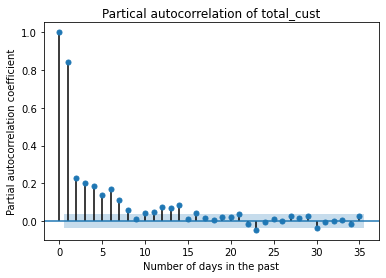

In [67]:
# plotting the partial autocorrelation for target

plot_pacf(bike_data['total_cust'], title='Partical autocorrelation of total_cust',)
plt.xlabel('Number of days in the past')
plt.ylabel('Partial autocorrelation coefficient')
plt.show()

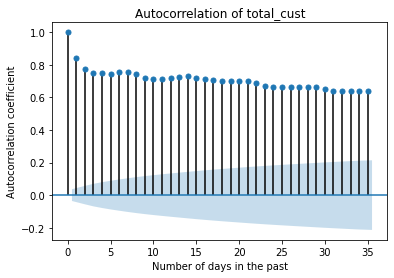

In [68]:
# plotting the autocorrelation for target

plot_acf(bike_data['total_cust'], title='Autocorrelation of total_cust',)
plt.xlabel('Number of days in the past')
plt.ylabel('Autocorrelation coefficient')
plt.show()

Based on the above plot, a lag of 1 shows significant correlation with t+0. Because of this high correlation, I will use the target variable at t-1 in my models.

In [69]:
# get the optimal window for rolling std for total_cust

print(best_window_std(bike_data['total_cust'], bike_data['total_cust'], 30))


# get the correlation for window size determined by total_cust

cust_mean = bike_data['total_cust'].rolling(8).std()[7:-1]
pearsonr(cust_mean, bike_data['total_cust'][8:])

{28: 0.4229738021169006, 1: 0.14849910136165323}


(0.3208335205188535, 9.428776427881618e-71)

In [70]:
# get the optimal number for rolling mean for total_cust

print(best_window(bike_data['total_cust'], bike_data['total_cust'], 30))


# get the correlation for window size determined by total_cust

cust_mean = bike_data['total_cust'].rolling(8).mean()[7:-1]
pearsonr(cust_mean, bike_data['total_cust'][8:])

{8: 0.8523138629506778, 29: 0.8292172214075906}


(0.8523138629506778, 0.0)

In [71]:
# add the value from t-1

bike_data['total_cust_t-1'] = bike_data['total_cust'].shift()

In [74]:
# create series that group the mean temperature per season

temp_spring = bike_data.groupby('spring')['temp_max'].mean().rename({1: 'Spring'})
temp_summer = bike_data.groupby('summer')['temp_max'].mean().rename({1: 'Summer'})
temp_fall = bike_data.groupby('fall')['temp_max'].mean().rename({1: 'Fall'})


# add them to one series and drop the rows with index 0

temp_seasons = temp_spring.append(temp_summer).append(temp_fall)
temp_seasons.drop(labels=[0], inplace=True)

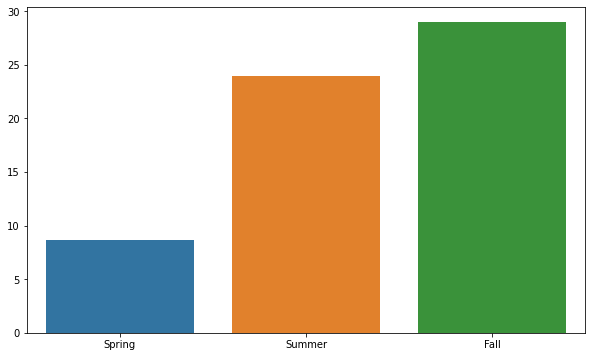

In [75]:
# plot average temp_max per season

plt.figure(figsize=[10,6])
sb.barplot(x=temp_seasons.index, y=temp_seasons.values);

In [76]:
# create series that groups average users per season
cust_spring = bike_data.groupby('spring')['total_cust'].mean().rename({1: 'Spring'})
cust_summer = bike_data.groupby('summer')['total_cust'].mean().rename({1: 'Summer'})
cust_fall = bike_data.groupby('fall')['total_cust'].mean().rename({1: 'Fall'})

# add them to one series and drop the rows with index 0
cust_seasons = cust_spring.append(cust_summer).append(cust_fall)
cust_seasons.drop(labels=[0], inplace=True)

<Figure size 1080x504 with 0 Axes>

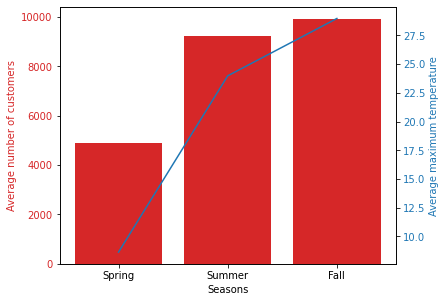

In [85]:
# assign x and y1 and y2
x = list(temp_seasons.index)
y1 = cust_seasons.values
y2 = temp_seasons.values


# creat plot containing both average count of customers
# and average temp per month
plt.figure(figsize=[15,7])
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color1 = 'tab:red'
ax1.set_xlabel('Seasons')
ax1.set_ylabel('Average number of customers', color=color1)
ax1.bar(x, y1, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

color2 = 'tab:blue'
ax2.set_ylabel('Average maximum temperature', color=color2)
ax2.plot(x, y2, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

fig.tight_layout(pad=0.0)
plt.show();

From the above graph we can see that the month variable is correlated with the average number of customers per that month as well as the average temperature. The temperature strongly determines the number of customers. The temperature is likely a very important feature for predicting the target variable.
**The higher the temperature, the higher the number of customers.**

**I will categorize the temperature into the following categories:**

*   Very Cold (below 0)
*   Cold (between 0 and 10)
*   Cool (between 10 and 20)
*   Warm (between 20 to 30)
*   Hot (30 or more)

In [86]:
# engineer new categorical temp features

bike_df_cat = bike_data.copy()
bike_df_cat['very_cold'] = bike_df_cat['temp_max'].apply(lambda x: 1 if x < 0 else 0)
bike_df_cat['cold'] = bike_df_cat['temp_max'].apply(lambda x: 1 if x < 10 and x >= 0 else 0)
bike_df_cat['cool'] = bike_df_cat['temp_max'].apply(lambda x: 1 if x < 20 and x >= 10 else 0)
bike_df_cat['warm'] = bike_df_cat['temp_max'].apply(lambda x: 1 if x < 30 and x >= 20 else 0)
bike_df_cat['hot'] = bike_df_cat['temp_max'].apply(lambda x: 1 if x >= 30 else 0)

bike_df_cat[['very_cold', 'cold', 'cool', 'warm', 'hot']] = bike_df_cat[['very_cold', 'cold', 'cool', 'warm', 'hot']].shift()


bike_df_cat = bike_df_cat.iloc[1:,:]

In [87]:
pearsonr(bike_df_cat['total_cust'], bike_df_cat['cold'])

(-0.4015910826314985, 1.222420256024716e-113)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

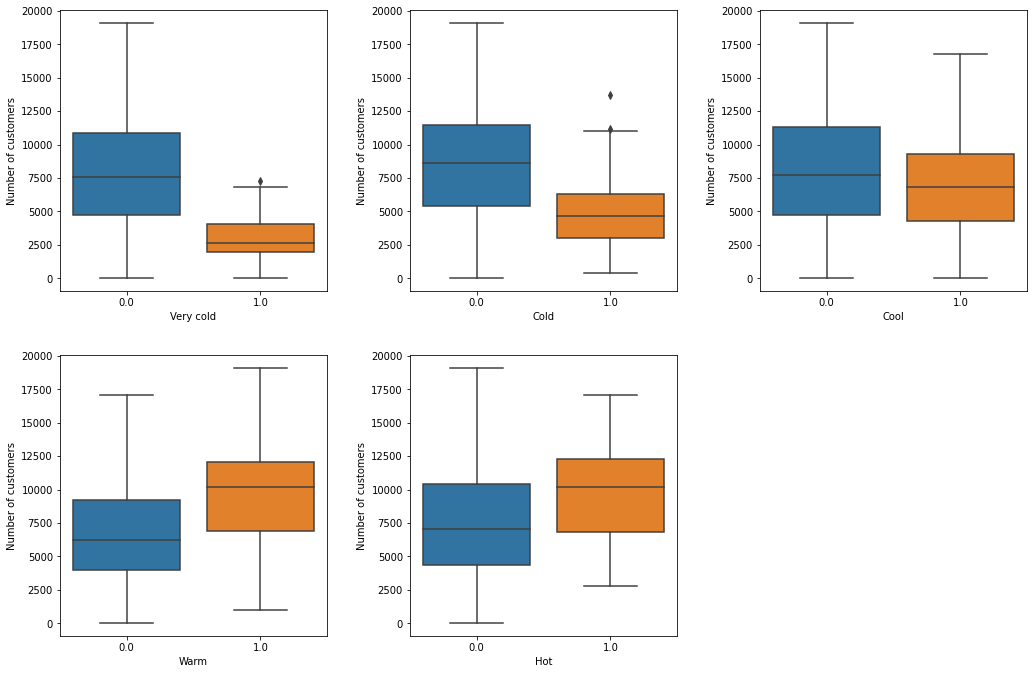

In [91]:
# plot categorized temperature

plt.figure(figsize=[15,10])
plt.subplot(2,3,1)
sb.boxplot(bike_df_cat['very_cold'], bike_df_cat['total_cust'])
plt.xlabel('Very cold')
plt.ylabel('Number of customers')

plt.subplot(2,3,2)
sb.boxplot(bike_df_cat['cold'], bike_df_cat['total_cust'])
plt.xlabel('Cold')
plt.ylabel('Number of customers')

plt.subplot(2,3,3)
sb.boxplot(bike_df_cat['cool'], bike_df_cat['total_cust'])
plt.xlabel('Cool')
plt.ylabel('Number of customers')

plt.subplot(2,3,4)
sb.boxplot(bike_df_cat['warm'], bike_df_cat['total_cust'])
plt.xlabel('Warm')
plt.ylabel('Number of customers')

plt.subplot(2,3,5)
sb.boxplot(bike_df_cat['hot'], bike_df_cat['total_cust'])
plt.xlabel('Hot')
plt.ylabel('Number of customers')


plt.tight_layout(pad=3.0) # Using padding to space the subplots for better viewing
plt.show();

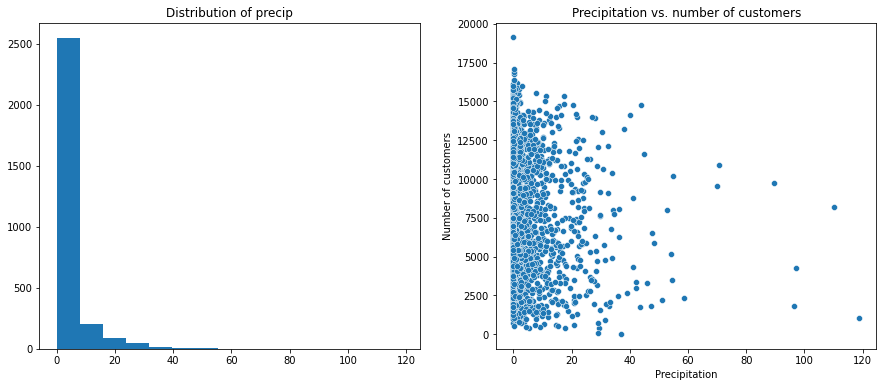

In [92]:
# plotting the distribution of precip
plt.figure(figsize=[15,6])

plt.subplot(1,2,1)
plt.hist(bike_data['precip'], bins=15)
plt.title('Distribution of precip')

plt.subplot(1,2,2)
sb.scatterplot(data = bike_data, x = 'precip', y = 'total_cust')
plt.xlabel('Precipitation')
plt.ylabel('Number of customers')
plt.title('Precipitation vs. number of customers');

Although precip is only correlated with total_cust in a weak sense, I will keep this in the model. This distribution is also left-skewed, so a logarithmic transformation will be necessary.

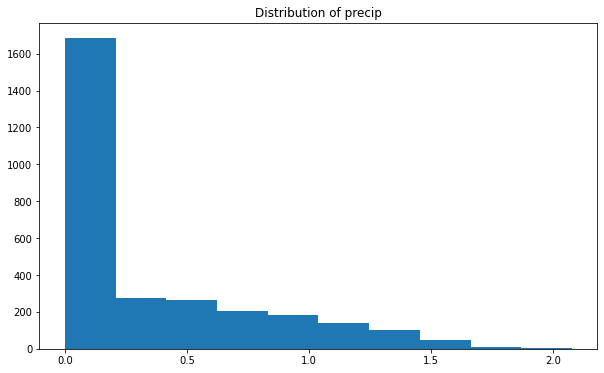

In [93]:
# plotting the distribution of precip
plt.figure(figsize=[10,6])

x = np.log10(bike_data['precip'] + 1)
plt.hist(x)
plt.title('Distribution of precip');

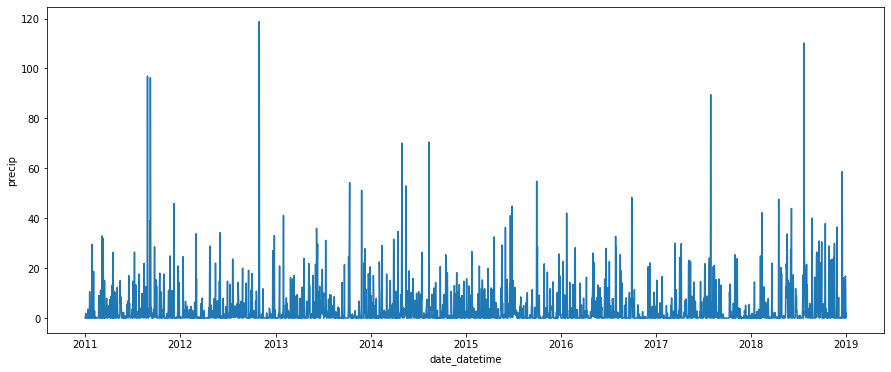

In [94]:
# plot the overall precip values for entire timeseries
plt.figure(figsize=[15,6])
ax = sb.lineplot(x='date_datetime', y='precip', data=bike_data)

In [95]:
# get the optimal number for rolling mean window

print(best_window(bike_data['precip'], bike_data['total_cust'], 30))


# get the correlation for window size determined by precip

precip_mean = bike_data['precip'].rolling(8).mean()[7:-1]
pearsonr(precip_mean, bike_data['total_cust'][8:])

{29: 0.1700866307778595, 1: 0.0084628681239576}


(0.08720391472567389, 2.4247240767198335e-06)

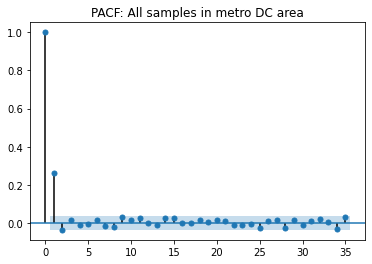

In [96]:
# plot the partial autocorrelation of precip
plot_pacf(bike_data['precip'], title='PACF: All samples in metro DC area',)
plt.show()

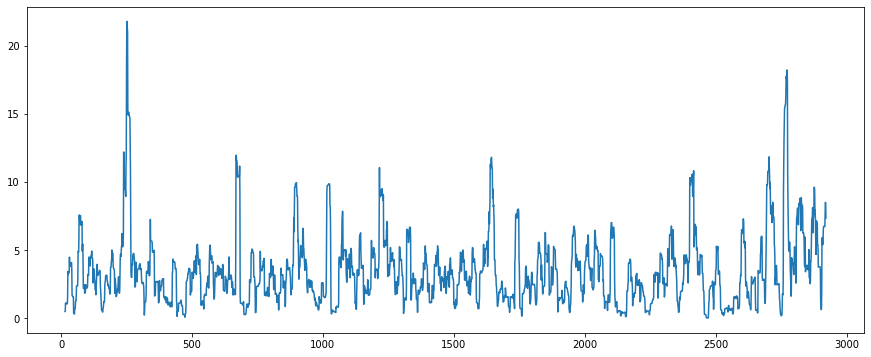

In [97]:
# create plot of rolling means
plt.figure(figsize=[15,6])

plt.plot(bike_data['precip'].rolling(16).mean());

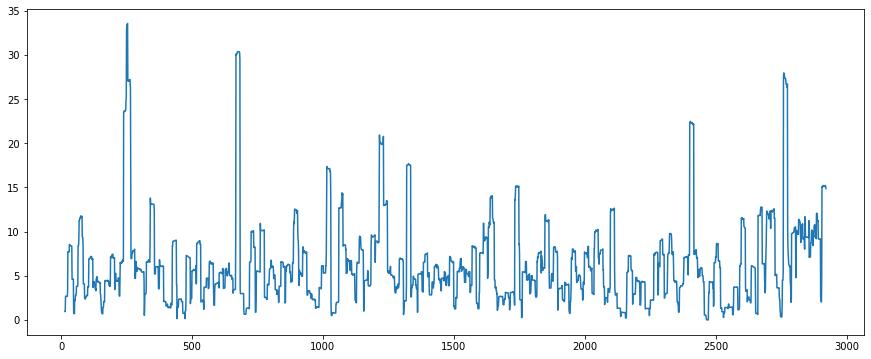

In [98]:
# create plot of rolling stds
plt.figure(figsize=[15,6])

plt.plot(bike_data['precip'].rolling(16).std());

## **Checking and dealing with stationarity**

A very important part before prediction can be accurate and successful is to make the time series stationary. Examples of how to do this can be found [here](https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/) for example.

**Augmented Dickey Fuller Test**

This code implementation is based on [this source](https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/)

In [99]:
def adf_test(df, col_names):
    '''
    Function to perform Augmented Dickey-Fuller test on selected timeseries
    Args: df = dataframe with timeseries to be tested
          col_names = list of names of the timeseries to be tested
    Returns: None
    '''
    for name in col_names:
        print ('Results of Augmented Dickey-Fuller Test for {}'.format(name))
        result_test = adfuller(df[name], autolag='AIC')
        result_output = pd.Series(result_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key, val in result_test[4].items():
            result_output['Critical Value (%s)'%key] = val
        print (result_output)

In [101]:
# create the features that need to be tested
# total_cust_t-1 was already added to the dataframe

testing_feat = ['wind', 'precip', 'total_cust', 'temp_min', 'temp_max', 'foggy', 'ice', 'thunder', 'sleet']

testing_df = pd.DataFrame()

for col in testing_feat:
    col_mean = bike_data[col].rolling(16).mean()[15:-1]
    col_std = bike_data[col].rolling(16).std()[15:-1]
    testing_df[col+'_mean16'] = col_mean.values
    testing_df[col+'_std16'] = col_std.values

In [102]:
# adf test for total_cust_t-1

temp_cust_1 = bike_data['total_cust_t-1'].fillna(0)
bike_df_temp = pd.DataFrame(temp_cust_1, columns=['total_cust_t-1'])
adf_test(bike_df_temp, ['total_cust_t-1'])

Results of Augmented Dickey-Fuller Test for total_cust_t-1
Test Statistic                   -3.085391
p-value                           0.027653
#Lags Used                       22.000000
Number of Observations Used    2899.000000
Critical Value (1%)              -3.432608
Critical Value (5%)              -2.862538
Critical Value (10%)             -2.567301
dtype: float64


In [104]:
# adf test for total_cust

adf_test(bike_data, ['total_cust'])

Results of Augmented Dickey-Fuller Test for total_cust
Test Statistic                   -3.068277
p-value                           0.028992
#Lags Used                       22.000000
Number of Observations Used    2899.000000
Critical Value (1%)              -3.432608
Critical Value (5%)              -2.862538
Critical Value (10%)             -2.567301
dtype: float64


In [105]:
# adf test for all engineered features

adf_test(testing_df, testing_df.columns)

Results of Augmented Dickey-Fuller Test for wind_mean16
Test Statistic                   -5.565211
p-value                           0.000002
#Lags Used                       28.000000
Number of Observations Used    2877.000000
Critical Value (1%)              -3.432625
Critical Value (5%)              -2.862545
Critical Value (10%)             -2.567305
dtype: float64
Results of Augmented Dickey-Fuller Test for wind_std16
Test Statistic                   -5.043268
p-value                           0.000018
#Lags Used                       17.000000
Number of Observations Used    2888.000000
Critical Value (1%)              -3.432616
Critical Value (5%)              -2.862541
Critical Value (10%)             -2.567303
dtype: float64
Results of Augmented Dickey-Fuller Test for precip_mean16
Test Statistic                -8.653592e+00
p-value                        5.038219e-14
#Lags Used                     2.700000e+01
Number of Observations Used    2.878000e+03
Critical Value (1%)    

Null hypothesis: data is not stationary

Alternative hypothesis: data is stationary

The results of the ADF Test can be intepreted as follows:


*   test-statistic < critical value --> reject null hypothesis (data is stationary)
*  test_statistic > critical value --> fail to reject null hypothesis (data is not stationary)

Based on these results, total_cust, total_cust_t-1 and total_cust_mean16 are not stationary at the 1%-level. This test does not look at the trend stationarity but rather at the difference stationarity. This means that total_cust_t-1 and total_cust_mean16 are not difference stationary at the 1%-level. The KPSS test is necessary to detemine the trend stationarity of the timeseries.

**Kwiatkowski-Phillips-Schmidt-Shin Test**

In [106]:
def kpss_test(df, col_names):
    '''
    Function to perform KPSS test on selected timeseries
    Args: df = dataframe with timeseries to be tested
          col_names = list of names of the timeseries to be tested
    Returns: None
    '''
    for name in col_names:
        print ('Results of KPSS Test for {}'.format(name))
        result_test = kpss(df[name], regression='c', lags='legacy')
        result_output = pd.Series(result_test[0:3], index=['Test Statistic','p-value','Lags Used'])
        for key, val in result_test[3].items():
            result_output['Critical Value (%s)'%key] = val
        print (result_output)

# kpss test for total_cust
kpss_test(testing_df, testing_df.columns)

Results of KPSS Test for wind_mean16
Test Statistic            0.361757
p-value                   0.093639
Lags Used                28.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
Results of KPSS Test for wind_std16
Test Statistic            0.066393
p-value                   0.100000
Lags Used                28.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
Results of KPSS Test for precip_mean16
Test Statistic            0.190685
p-value                   0.100000
Lags Used                28.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
Results of KPSS Test for precip_std16
Test Statistic            0.12816
p-value                   0.10000
La

<ipython-input-106-f81aca899a9b>:10: FutureWarning: the 'lags'' keyword is deprecated, use 'nlags' instead
  result_test = kpss(df[name], regression='c', lags='legacy')
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/st

In [107]:
# kpss test for total_cust_t-1
kpss_test(bike_df_temp, ['total_cust_t-1'])

# kpss test for total_cust
kpss_test(bike_data, ['total_cust'])

Results of KPSS Test for total_cust_t-1
Test Statistic            4.452604
p-value                   0.010000
Lags Used                28.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
Results of KPSS Test for total_cust
Test Statistic            4.430839
p-value                   0.010000
Lags Used                28.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


<ipython-input-106-f81aca899a9b>:10: FutureWarning: the 'lags'' keyword is deprecated, use 'nlags' instead
  result_test = kpss(df[name], regression='c', lags='legacy')
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Null hypothesis: data is stationary

Alternative hypothesis: data is not stationary

The results of the KPSS Test can be intepreted as follows:

*   test-statistic > critical value --> reject null hypothesis (data is not stationary)
*   test_statistic < critical value --> fail to reject null hypothesis (data is stationary)

Based on these results, all total_cust and rain features are not trend stationary at the 1%-level.

This has the following implications for the evaluated timeseries:

*   difference and trend stationary: no transformations are needed
*   difference stationary and not trend stationary: total_cust_std16 --> transformations needed
*   not difference stationary but trend stationary: total_cust --> transformations needed
*   not difference and not trend stationary: total_cust_mean16, total_cust_t-1 --> transformations needed

### **Trend**

In [108]:
# Removing positive upward trend from total_cust_mean16, total_cust_std16 and total_cust_t-1

testing_df['total_cust_std16_log'] = [np.log1p(x+1) for x in testing_df['total_cust_std16']]
testing_df['total_cust_mean16_log'] = [np.log1p(x+1) for x in testing_df['total_cust_mean16']]
bike_df_temp['total_cust_t-1_log'] = [np.log1p(x+1) for x in bike_df_temp['total_cust_t-1']]

**Differencing**

In [109]:
# applying differencing to remove trend from total_cust

bike_df_check = bike_data[['total_cust']]
bike_df_check['total_cust_diff'] = bike_df_check['total_cust'] - bike_df_check['total_cust'].shift()
bike_df_check = bike_df_check.iloc[1:,]

<ipython-input-109-20622e7b8087>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_df_check['total_cust_diff'] = bike_df_check['total_cust'] - bike_df_check['total_cust'].shift()


In [110]:
# kpss test for total_cust
kpss_test(testing_df, ['total_cust_std16_log', 'total_cust_mean16_log'])
kpss_test(bike_df_temp, ['total_cust_t-1_log'])

# adf test for total_cust
adf_test(testing_df, ['total_cust_std16_log', 'total_cust_mean16_log'])
adf_test(bike_df_temp, ['total_cust_t-1_log'])
adf_test(bike_df_check, ['total_cust_diff'])

Results of KPSS Test for total_cust_std16_log
Test Statistic            6.328651
p-value                   0.010000
Lags Used                28.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
Results of KPSS Test for total_cust_mean16_log
Test Statistic            4.412647
p-value                   0.010000
Lags Used                28.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
Results of KPSS Test for total_cust_t-1_log
Test Statistic            4.013791
p-value                   0.010000
Lags Used                28.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
Results of Augmented Dickey-Fuller Test for total_cust_std16_log
Test Statistic    

<ipython-input-106-f81aca899a9b>:10: FutureWarning: the 'lags'' keyword is deprecated, use 'nlags' instead
  result_test = kpss(df[name], regression='c', lags='legacy')
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Test Statistic                   -3.959044
p-value                           0.001641
#Lags Used                       28.000000
Number of Observations Used    2877.000000
Critical Value (1%)              -3.432625
Critical Value (5%)              -2.862545
Critical Value (10%)             -2.567305
dtype: float64
Results of Augmented Dickey-Fuller Test for total_cust_t-1_log
Test Statistic                   -3.902610
p-value                           0.002016
#Lags Used                       26.000000
Number of Observations Used    2895.000000
Critical Value (1%)              -3.432611
Critical Value (5%)              -2.862539
Critical Value (10%)             -2.567302
dtype: float64
Results of Augmented Dickey-Fuller Test for total_cust_diff
Test Statistic                -1.530200e+01
p-value                        4.300136e-28
#Lags Used                     2.100000e+01
Number of Observations Used    2.899000e+03
Critical Value (1%)           -3.432608e+00
Critical Value (5%)      

The transformations I implemented above can be used later on to make the timeseries stationary. I will create classes to make the necessary transformations inside the ML pipeline.

## **Feature Selection**
Based on the EDA above, I will choose the following features

*   holiday: t0
*   weekdays: each day at t0
*   workingday: t0
*   temp_max: rolling mean for 8 days
*   temp_max: rolling std for 8 days
*   temp_min:rolling mean for 8 days
*   temp_min: rolling std for 8 days
*   season_spring: t0
*   season_summer: t0
*   season_fall: t0
*   very cold, cold, cool, warm, hot: t-1
*   foggy, thunder, ice, sleet: rolling mean and std for 8 days
*   wind: rolling mean for 8 days
*   wind: rolling std for 8 days
*   precip: rolling mean for 8 days
*   precip: rolling std for 8 days
*   total_cust: t-1
*   total_cust: rolling mean for 8 days
*   total_cust: rolling std for 8 days

### **Data Preparation**

**Dropping unnecessary columns**

I am only going to remove any columns which I no longer need and split the dataframes into X and y.

In [111]:
# should keep this before the cleaning function has been created

bike_data.drop(columns=['temp_observ', 'weekday'], axis=1, inplace=True)

In [112]:
# drop the timestamp variable

bike_data.drop(columns=['date_datetime'], inplace=True)

### **Creating new features**

In [113]:
# specify the window for rolling values

window = 8

In [114]:
# engineer new categorical temp features

bike_df_cat = bike_data[['temp_max']].copy()
bike_df_cat['very_cold'] = bike_df_cat['temp_max'].apply(lambda x: 1 if x < 0 else 0)
bike_df_cat['cold'] = bike_df_cat['temp_max'].apply(lambda x: 1 if x < 10 and x >= 0 else 0)
bike_df_cat['cool'] = bike_df_cat['temp_max'].apply(lambda x: 1 if x < 20 and x >= 10 else 0)
bike_df_cat['warm'] = bike_df_cat['temp_max'].apply(lambda x: 1 if x < 30 and x >= 20 else 0)
bike_df_cat['hot'] = bike_df_cat['temp_max'].apply(lambda x: 1 if x >= 30 else 0)

bike_df_cat[['very_cold', 'cold', 'cool', 'warm', 'hot']] = bike_df_cat[['very_cold', 'cold', 'cool', 'warm', 'hot']].shift()

bike_df_cat.drop(columns=['temp_max'], inplace=True)

In [115]:
# creating rolling values

new_feat = ['wind', 'precip', 'total_cust', 'temp_max', 'temp_min', 'foggy', 'ice', 'thunder', 'sleet']

temp_df = pd.DataFrame()

for col in new_feat:
    col_mean = bike_data[col].rolling(window).mean()[(window-1):-1]
    col_std = bike_data[col].rolling(window).std()[(window-1):-1]
    temp_df[col+'_mean'+str(window)] = col_mean.values
    temp_df[col+'_std'+str(window)] = col_std.values

In [116]:
# remember to remove the first row from 16 rows from total_cust (target label)

new_bike_df = bike_data.iloc[window:,:]
bike_df_cat = bike_df_cat.iloc[window:,:]
new_bike_df.reset_index(drop=True, inplace=True)
bike_df_cat.reset_index(drop=True, inplace=True)
new_bike_df.head()

,temp_min,temp_max,precip,wind,total_cust,holiday,spring,summer,fall,weekday_1,...,weekday_3,weekday_4,weekday_5,weekday_6,working_day,foggy,thunder,ice,sleet,total_cust_t-1
0,-6.293333,0.226667,0.283529,6.425,802.0,0.0,1,0,0,0,...,0,0,0,1,0.0,1,0.0,0,0,939.0
1,-6.238462,0.507692,0.000000,2.975,1298.0,0.0,1,0,0,0,...,0,0,0,0,0.0,1,0.0,0,0,802.0
2,-5.914286,0.564286,0.460241,1.350,1231.0,0.0,1,0,0,1,...,0,0,0,0,1.0,1,0.0,1,1,1298.0
3,-5.114286,0.192857,3.526882,5.675,1141.0,0.0,1,0,0,0,...,0,0,0,0,1.0,1,0.0,0,1,1231.0
4,-4.600000,1.035714,0.000000,5.025,1383.0,0.0,1,0,0,0,...,1,0,0,0,1.0,1,0.0,0,0,1141.0


In [117]:
# drop all columns which we cannot use because of lookahead bias

new_bike_df.drop(columns=['temp_max', 'wind', 'temp_min', 'precip', 
                          'thunder', 'foggy', 'ice', 'sleet'], inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [118]:
# merging both dataframes with features

final_bike_df = new_bike_df.join(temp_df, how='left')
final_bike_df = final_bike_df.join(bike_df_cat, how='left')

,total_cust,holiday,spring,summer,fall,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,...,ice_std8,thunder_mean8,thunder_std8,sleet_mean8,sleet_std8,very_cold,cold,cool,warm,hot
0,802.0,0.0,1,0,0,0,0,0,0,0,...,0.353553,0.0,0.0,0.375,0.517549,0.0,1.0,0.0,0.0,0.0
1,1298.0,0.0,1,0,0,0,0,0,0,0,...,0.353553,0.0,0.0,0.375,0.517549,0.0,1.0,0.0,0.0,0.0
2,1231.0,0.0,1,0,0,1,0,0,0,0,...,0.353553,0.0,0.0,0.375,0.517549,0.0,1.0,0.0,0.0,0.0
3,1141.0,0.0,1,0,0,0,1,0,0,0,...,0.462910,0.0,0.0,0.500,0.534522,0.0,1.0,0.0,0.0,0.0
4,1383.0,0.0,1,0,0,0,0,1,0,0,...,0.462910,0.0,0.0,0.625,0.517549,0.0,1.0,0.0,0.0,0.0


### **Assinging X and y**

In [119]:
# assigning X and y

y = final_bike_df['total_cust']
X = final_bike_df.drop(columns=['total_cust'])

## **Model**

Creating transformation classes

In [121]:
# creating a class that I can use in the ML pipeline that prints out the transformed data that will enter the model

class Debug(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        self.shape = X.shape
        print(self.shape)
        X_df = pd.DataFrame(X)
        print(X_df)
        # print(X_df.to_string()) # can only be print like this without running LagVars() to avoid crashing
        # what other output you want
        return X

### **Baseline model: naive univariate prediction**

When using autoregression models, we're only focusing on the target variable and aim to predict this variable with its previous values.

In [123]:
# assigning X and y for the univariate naive prediction

y_naive = (final_bike_df['total_cust'].copy())
X_naive = y_naive.copy()
X_naive = pd.DataFrame(data=X_naive, columns=['total_cust'])

# getting the start time

start_time = datetime.now()

# creating y_pred

y_pred = (X_naive.shift())[1:]

# adjusting length of the actual target values

y_naive = y_naive[1:]

# get final time

end_time = datetime.now()
print('Total running time of naive predictor:', (end_time - start_time).total_seconds())

# calculating the scores for the last value method
print('RMSE:', np.sqrt(mean_squared_error(y_naive, y_pred)))
print('RMSLE:', np.sqrt(mean_squared_log_error(y_naive, y_pred)))
print('MAE:', mean_absolute_error(y_naive, y_pred))

Total running time of naive predictor: 0.000546
RMSE: 2092.6809614099934
RMSLE: 0.40731742102103863
MAE: 1403.2437349811191


**Preparation code for using differenced y for predictions**

In [124]:
y_log = final_bike_df[['total_cust']].copy()
y_log['total_cust'] = y_log['total_cust'].apply(lambda x: np.log1p(x+1))
y_shift = y_log.shift(1)
y_diff = (y_log - y_shift)[1:]
X_diff = X[1:]

y_diff.reset_index(drop=True, inplace=True)
X_diff.reset_index(drop=True, inplace=True)

### **Random Forest model**

In [126]:
# initializing the model which is a Random Forest model and uses default hyperparameters

model_rf_diff = RandomForestRegressor(random_state=42)

In [128]:
# creating and fitting the ML pipeline
trend_features = ['total_cust_mean'+str(window), 'total_cust_std'+str(window), 'total_cust_t-1']

preprocessor = ColumnTransformer([
    ('trend_diff', FunctionTransformer(np.log1p, validate=False), trend_features),
], remainder='passthrough')

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    #('debug', Debug()) # I have commented this out because it will hinder the execution of this pipeline
    ('model', model_rf_diff)
])

pipeline_rf_diff = pipeline.fit(X_diff, y_diff)

NameError: ignored